In [ ]:
'''
Dựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng
Dataset: FuelConsumptionCo2.csv
'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and quick view data

In [2]:
fuel = pd.read_csv('FuelConsumptionCo2.csv')

In [ ]:
# ? rows ? columns ? non-null ? type ? duplicate

In [3]:
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Tổng hàng và cột của fuel data
fuel.shape

(1067, 13)

In [5]:
# Các cột data của mình có missing values hay không
fuel.notnull().any()

MODELYEAR                   True
MAKE                        True
MODEL                       True
VEHICLECLASS                True
ENGINESIZE                  True
CYLINDERS                   True
TRANSMISSION                True
FUELTYPE                    True
FUELCONSUMPTION_CITY        True
FUELCONSUMPTION_HWY         True
FUELCONSUMPTION_COMB        True
FUELCONSUMPTION_COMB_MPG    True
CO2EMISSIONS                True
dtype: bool

In [6]:
# Thông tin chung của fuel data của mình 
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [15]:
# Các cột dạng OBJECT nên chuyển sang dạng CATEGORY để dungf select_dtype()
cate_lst = ['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']

array(['Z', 'D', 'X', 'E'], dtype=object)

In [8]:
fuel[fuel.duplicated()]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


In [16]:
fuel.duplicated().sum()

0

# Data Cleaning

In [4]:
fuel.select_dtypes('object').columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [20]:
fuel.select_dtypes(['int64', 'float64']).columns

Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
# Convert Object to Category dtype (For loop tốn dung lượng hơn)
for v in fuel.select_dtypes('object').columns:
    fuel[v] = fuel[v].astype('category')

fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   category
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(5), float64(4), int64(4)
memory usag

In [24]:
# Option 2 to convert:
fuel[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']] = fuel[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']].astype('category')

# Descriptive Analysis

In [26]:
# Export general information on fuel data
fuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [28]:
fuel['MODELYEAR'].unique()

array([2014], dtype=int64)

In [ ]:
# ENGINESIZE: min - 75% : 1 -4.3 nhưng max = 8 nên outliers tuy nhiên mean xấp xỉ = median 
# CYLINDERS: tương tự có outliers nhưng không quá nghiêm trọng vì mean xấp xỉ = median 
# CITY: Có outliers vì max khá cao so với median nhưng median với mean khá ổn với nhau
# HWY: có outliers và tương tự vì sẽ có một số loại xe sẽ có mức tiêu thụ khá cao so với các loại xe còn loại
# COMB: tương tự vì thuộc loại mức tiêu thụ nhiên liệu
# MPG: tượng tự 
# chia ra hai nhóm tương quan: Nhóm 1 (City, HWY, COMB, MPG), Nhóm 2 (enginesize cylinders)
# CO2: cũng có outliers tương tự do bị ảnh hưởng bởi các features về mức tiêu thụ 
# Do đó có một số loại xe có mức tiêu thụ đột biến so với các loại xe còn lại

In [30]:
fuel.select_dtypes('category').describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [36]:
fuel['MAKE'][fuel['CO2EMISSIONS'] >= 300].unique()

['ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'CADILLAC', ..., 'RAM', 'ROLLS-ROYCE', 'SRT', 'SUBARU', 'TOYOTA']
Length: 28
Categories (39, object): ['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', ..., 'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']

![](https://upload.wikimedia.org/wikipedia/commons/0/0d/Distribution_of_Annual_Household_Income_in_the_United_States_2010.png)

https://www.youtube.com/watch?v=2oJldeE4JcU

https://www.youtube.com/watch?v=rzFX5NWojp0m

<Figure size 1440x1080 with 0 Axes>

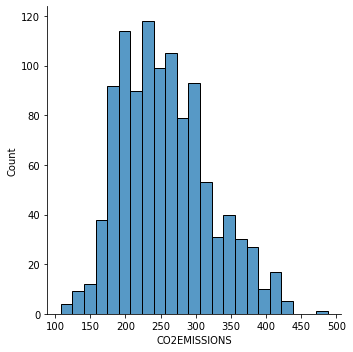

In [40]:
plt.figure(figsize = (20, 15))

sns.displot(data = fuel, x = 'CO2EMISSIONS')
plt.show()

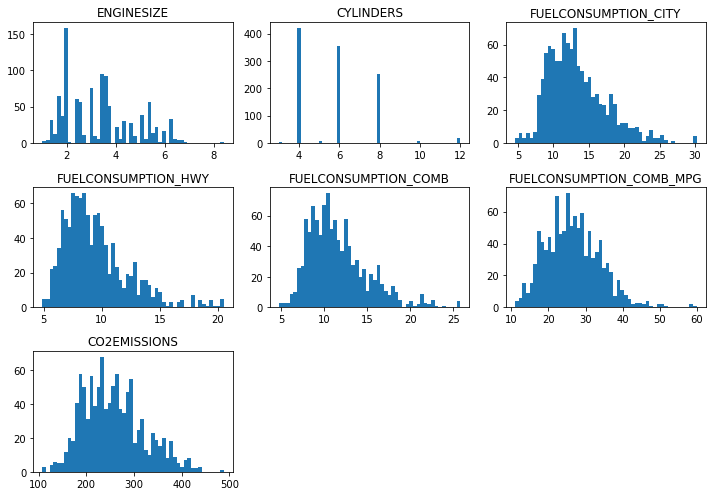

In [48]:
df_num = fuel.select_dtypes(exclude='category').drop('MODELYEAR',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = int(np.ceil(df_num.shape[1] / ncols))

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=50, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='CO2EMISSIONS'>

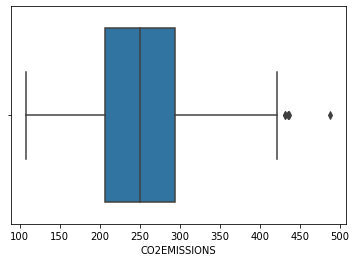

In [49]:
sns.boxplot(data = fuel, x = 'CO2EMISSIONS')

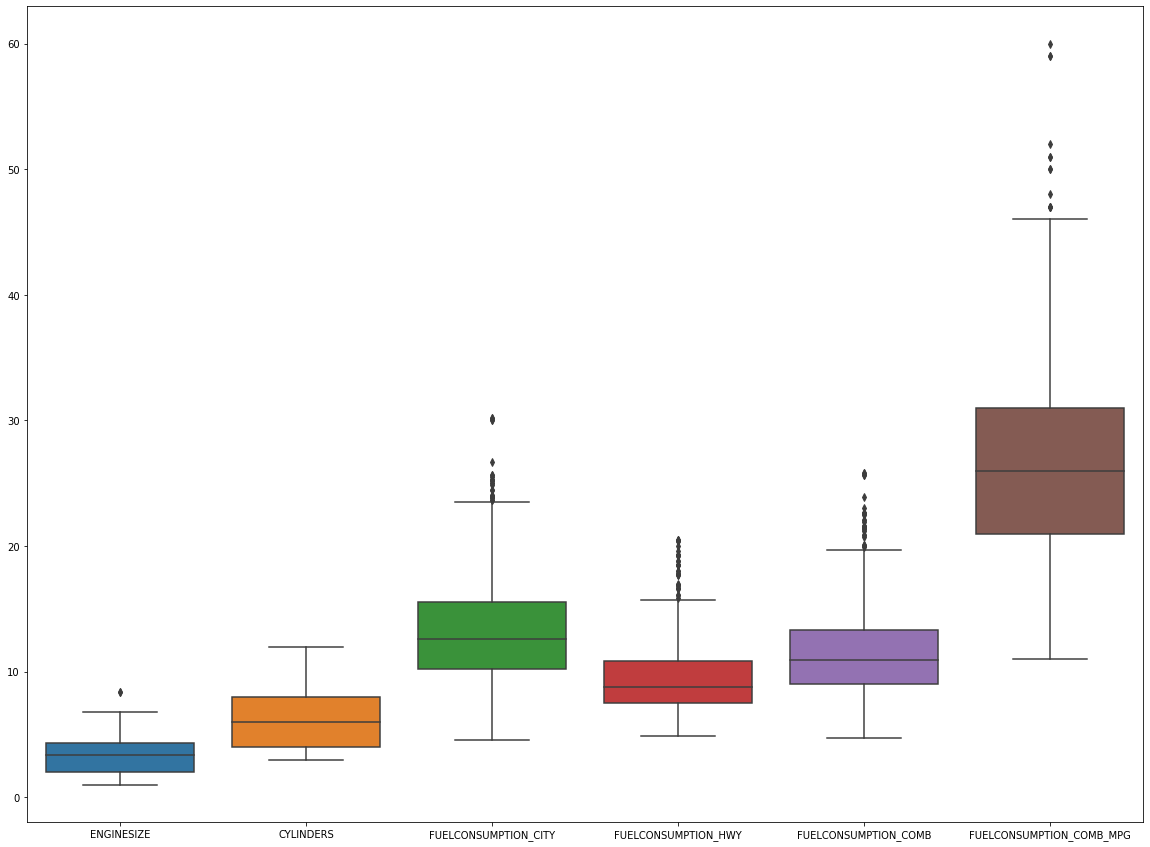

In [52]:
plt.figure(figsize = (20, 15))
sns.boxplot(data = fuel.select_dtypes(['int64', 'float64']).drop(['MODELYEAR', 'CO2EMISSIONS'], axis = 1))

plt.show()

# Diagnostic Analysis

![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [53]:
fuel.select_dtypes(['int64', 'float64']).corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


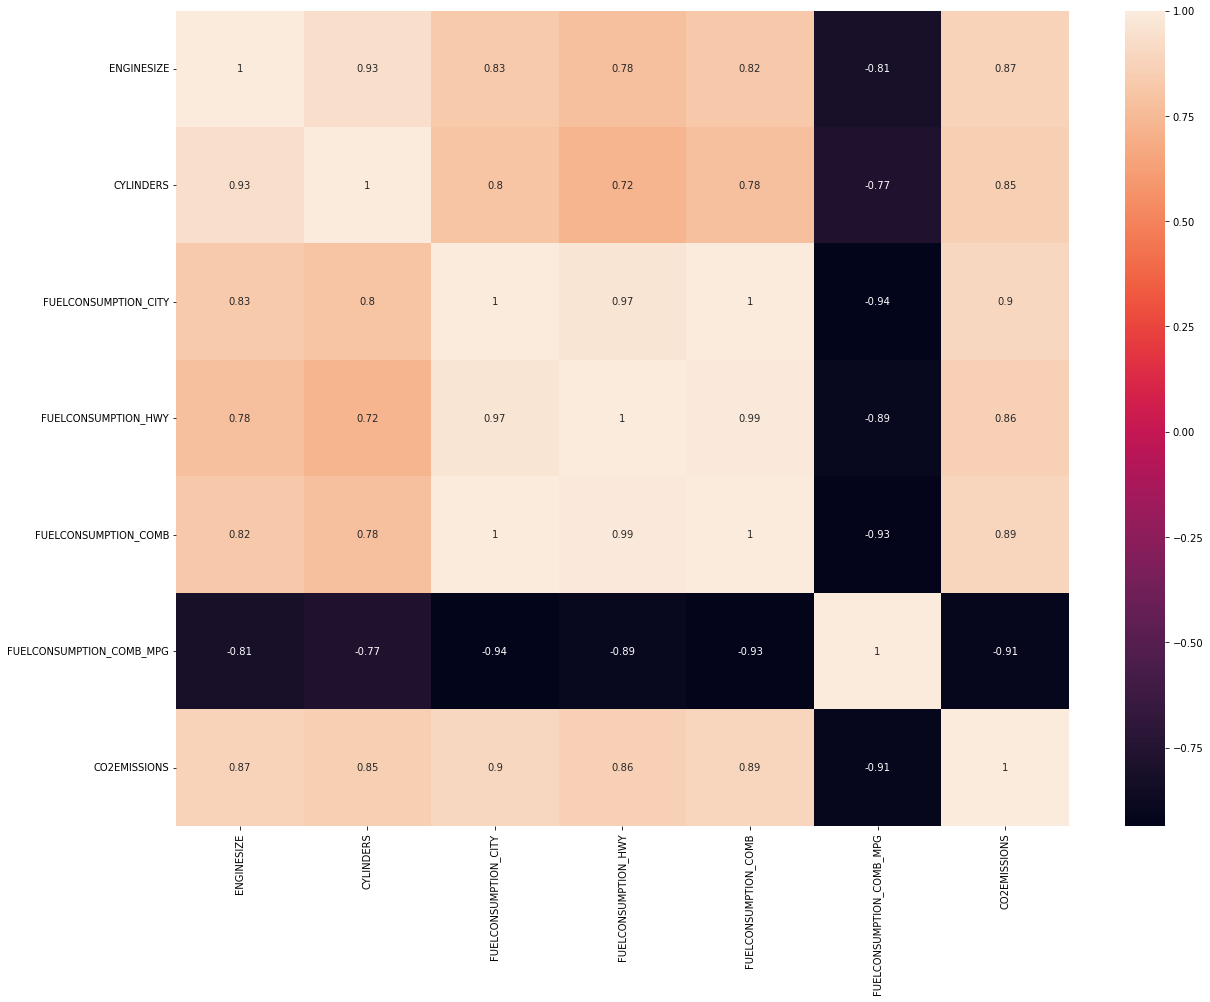

In [54]:
plt.figure(figsize = (20, 15))

sns.heatmap(data = fuel.select_dtypes(['int64', 'float64']).drop('MODELYEAR', axis = 1).corr(), annot = True)
plt.show()

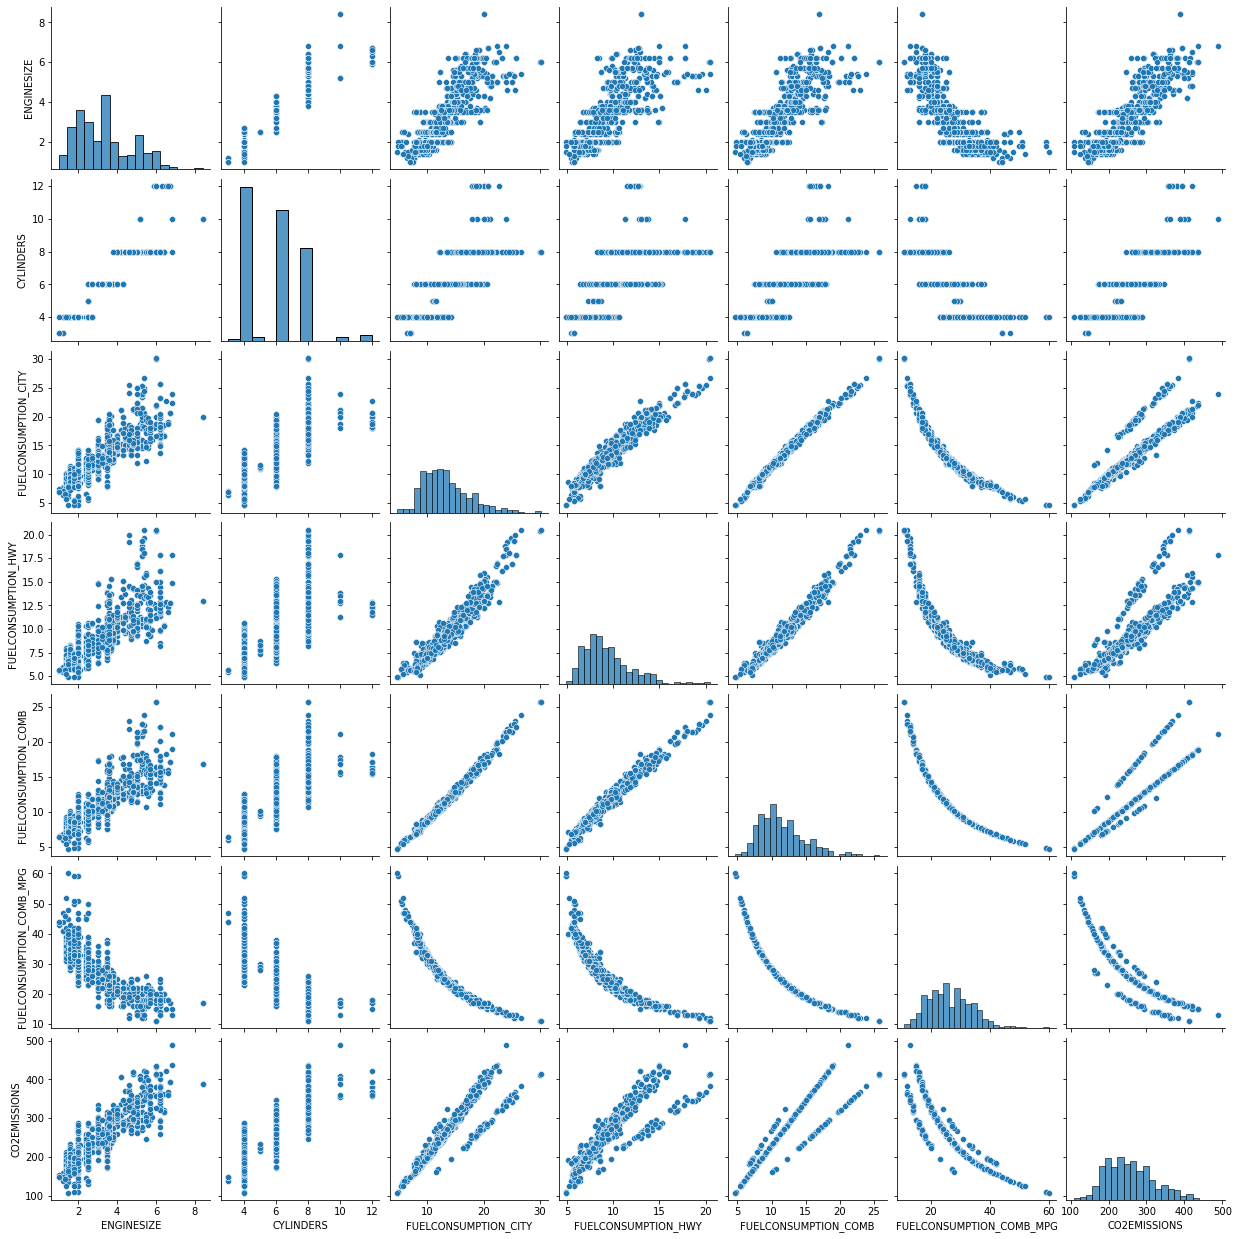

In [55]:
sns.pairplot(data = fuel.select_dtypes(['int64', 'float64']).drop('MODELYEAR', axis = 1))

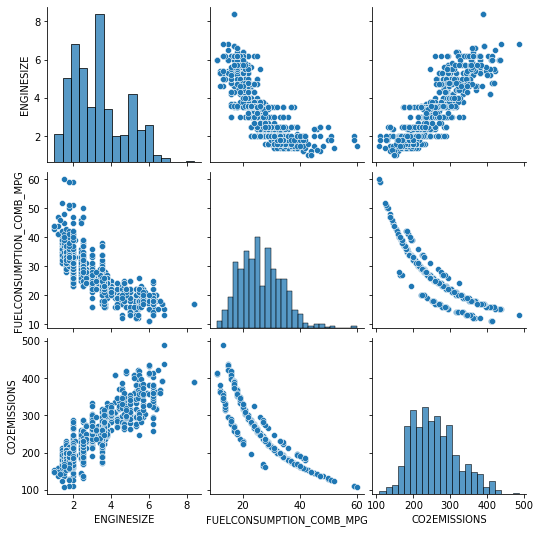

In [68]:
sns.pairplot(fuel[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']])

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_CITY'>

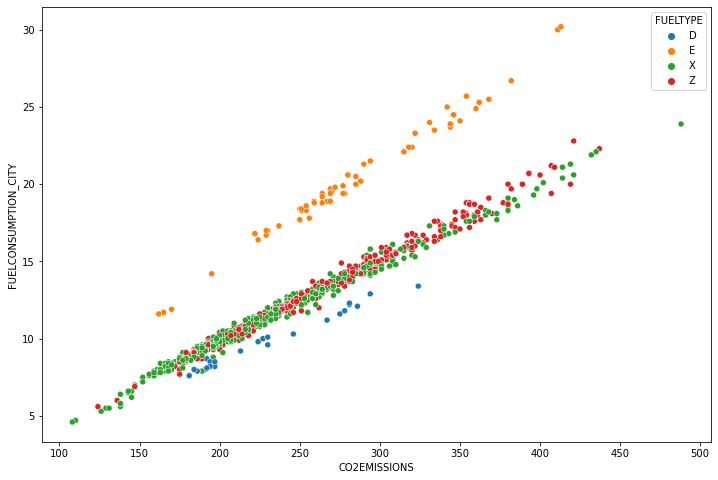

In [65]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = fuel, x = 'CO2EMISSIONS', y = 'FUELCONSUMPTION_CITY', hue = 'FUELTYPE')

In [ ]:
# Theo hình trên thì E class thì nên được tách riêng để phân tích vì nó là một cluster riêng

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_COMB_MPG'>

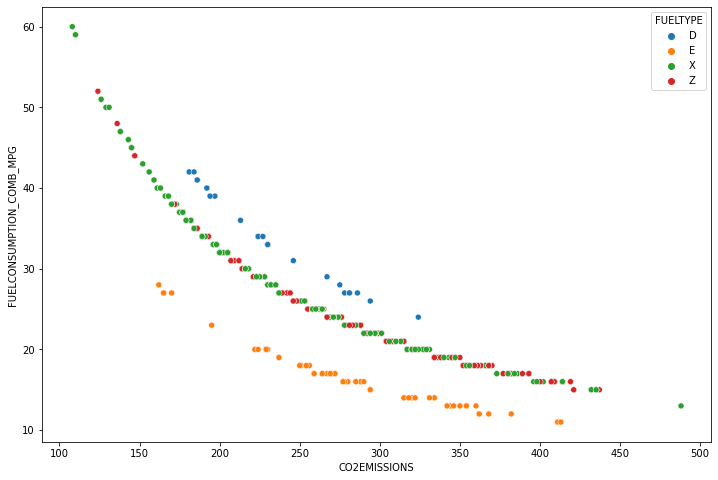

In [69]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = fuel, x = 'CO2EMISSIONS', y = 'FUELCONSUMPTION_COMB_MPG', hue = 'FUELTYPE')

# Feature Selection & Training

![](https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2020/03/Linear_Regression_fit_with_Matrix_Multiplication.jpg?fit=594%2C396&ssl=1)

https://www.youtube.com/watch?v=iIUq0SqBSH0

In [6]:
from sklearn.linear_model import LinearRegression # model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # evaluation metrics
from sklearn.model_selection import train_test_split

In [ ]:
y -> predict
x -> feature
y = ax + b

row 1: 20 = a.3 + b -> a,b
row 2: 19 = a.3.5 + b -> a,b

In this case:
x: ENGINESIZE
y: CO2EMISSION

In [9]:
model = LinearRegression()
model.fit(fuel[['ENGINESIZE']], fuel[['CO2EMISSIONS']])

LinearRegression()

In [12]:
model.coef_ # Hệ số góc

array([[39.12519979]])

In [13]:
model.intercept_ # b trong phương trình tuyến tính (Bias)

array([125.3040995])

In [21]:
# Cách tìm Co2 Emission bằng phương trình tuyến tính và thế số vào để có giá trị predict
manual_result = pd.DataFrame(model.coef_ * fuel[['ENGINESIZE']] + model.intercept_)
manual_result.rename(columns = {'ENGINESIZE':'CO2EMISSIONS_MANUAL'}, inplace = True)
manual_result

,CO2EMISSIONS_MANUAL
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [22]:
# Cách dùng model Linear Regression
model_result = pd.DataFrame(model.predict(fuel[['ENGINESIZE']]))
model_result.columns = ['CO2EMISSIONS_MODEL']
model_result

,CO2EMISSIONS_MODEL
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [29]:
total_result = pd.concat([manual_result, model_result])
total_result

,CO2EMISSIONS_MANUAL,CO2EMISSIONS_MODEL
0,203.554499,NaN
1,219.204579,NaN
2,183.991899,NaN
3,262.242299,NaN
4,262.242299,NaN
...,...,...
1062,NaN,242.679699
1063,NaN,250.504739
1064,NaN,242.679699
1065,NaN,250.504739


![](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=v2&px=400)

In [ ]:
mean_absolute_error, mean_squared_error, r2_score

![](https://i.imgur.com/19LNbyQ.jpeg)

![](https://pbs.twimg.com/media/FAX6eHvWEAIWBjB.png)

![](https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSR-and-SST.jpg)

In [ ]:
# Chỉ số R2 càng cao thì model train càng tốt
# SSR Sum of squares of residuals
# SST Total of square 

In [30]:
mean_absolute_error(fuel[['CO2EMISSIONS']], model_result)

23.346887834400427

In [31]:
mean_squared_error(fuel[['CO2EMISSIONS']], model_result)

946.3140527188749

In [32]:
r2_score(fuel[['CO2EMISSIONS']], model_result)

0.7641458597854816

In [33]:
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Evaluation

![](https://spidec.files.wordpress.com/2017/05/fittings.jpg?w=702)

**Evaluation methods**
- Train - test
- Train - val - test
-> `train_test_split()`
- K-fold cross validation (K=5, 10, ...)
![](https://baoboitoithuong.com/cross-validation-la-gi/imager_2_3182_700.jpg)

In [40]:
from sklearn.model_selection import KFold, cross_val_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(fuel[['ENGINESIZE']], fuel['CO2EMISSIONS'], test_size = 0.2, shuffle = True, random_state = 42)
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

cross_val_score(LinearRegression(), X_train, y_train, scoring = 'r2', cv = folds)

array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554])

In [44]:
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Tuning

In [54]:
model = LinearRegression()
model.fit(fuel[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']], fuel['CO2EMISSIONS'])

LinearRegression()

In [55]:
result = model.predict(fuel[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
r2_score(fuel[['CO2EMISSIONS']], result)

0.8627973904839377

In [56]:
r2_score(fuel[['CO2EMISSIONS']], model_result)

0.7641458597854816

In [ ]:
'''
Optimize model
GridsearchCV
'''

In [58]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination (Giới hạn features)
from sklearn.model_selection import GridSearchCV # Tìm tổ hợp features tối ưu

In [60]:
X_train, X_test, y_train, y_test = train_test_split(fuel.select_dtypes(exclude = 'category').drop(['MODELYEAR','CO2EMISSIONS'], axis = 1),
                                                    fuel['CO2EMISSIONS'], test_size = 0.2, shuffle = True, random_state = 42)

In [61]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
333,1.4,4,8.5,6.9,7.8,36
106,4.4,8,15.0,9.8,12.7,22
585,3.0,6,11.2,8.4,9.9,29
55,3.0,6,13.2,9.2,11.4,25
213,5.3,8,18.3,14.2,16.5,17


In [62]:
# Create k fold
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Range to tune
hyper_params = {'n_features_to_select': list(range(1, 10))}

# Specify model
model = LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model)

# Tuning with GridSearchCV
model_cv = GridSearchCV(estimator = rfe,
                       param_grid = hyper_params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
'param_n_features_to_select'
'mean_train_score'
'mean_test_score'

In [65]:
model_cv.cv_results_

{'mean_fit_time': array([0.09083982, 0.00959644, 0.01039748, 0.01120129, 0.00799809,
        0.007198  , 0.00559793, 0.00879836, 0.01040006]),
 'std_fit_time': array([1.47743866e-01, 1.95760071e-03, 1.96015110e-03, 2.99335730e-03,
        1.45884118e-06, 1.60021897e-03, 1.95964474e-03, 5.87738251e-03,
        4.79638817e-03]),
 'mean_score_time': array([0.00479851, 0.00400057, 0.00159931, 0.00319571, 0.        ,
        0.00479875, 0.00239959, 0.00320053, 0.00799508]),
 'std_score_time': array([1.59688022e-03, 2.65320353e-06, 1.95874901e-03, 2.98750339e-03,
        0.00000000e+00, 1.59997942e-03, 1.95925516e-03, 2.99477891e-03,
        3.57686574e-03]),
 'param_n_features_to_select': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_features_to_select': 1},
  {'n_features_to_select': 2},
  {'n_features_to_select': 3},
 

R2-score của cả hai tập training and testing có cùng tăng hay không? - Elbow method (Tìm giá trị bão hòa nơi score không tăng nữa - remain static)